## Introduction

Explain this

In [1660]:
import autograd.numpy as np
from autograd import grad
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


In [1661]:
df = pd.read_csv("./train",header=None, names= ["id","c1","c2","c3", "c4", "c5"])

In [1662]:
test = pd.read_csv("./test",header=None, names= ["id","c1","c2","c3", "c4","c5"])

In [1688]:
test

,id,c1,c2,c3,c4,c5
0,P0,-1,0,0,1,0
1,P0,1,-1,0,-1,0
2,P0,-1,1,-1,-1,-1
3,P0,0,-1,0,0,-1
4,P0,0,0,0,1,-1
5,P0,0,0,0,0,1
6,P1,1,1,0,0,0
7,P1,0,0,1,0,-1
8,P1,0,0,-1,0,0
9,P1,1,0,1,1,0


In [1663]:
def getProblem(id):
    problemChunk = df[df["id"]== ("P" + str(id))][["c1", "c2", "c3", "c4", "c5"]]
    return (problemChunk[0:len(problemChunk)-1].values.astype(float), problemChunk["c5"].values[5])
  
def getTestProblem(id):
    problemChunk = test[test["id"]== ("P" + str(id))][["c1", "c2", "c3", "c4", "c5"]]
    return (problemChunk[0:len(problemChunk)-1].values.astype(float), problemChunk["c5"].values[5])
    

In [1664]:
count = 0

In [1665]:
for i in range(0,1000):
    ans = getProblem(i)
    count = count + ans[1]

In [1666]:
count

959

In [1667]:
def sigmoid(x):
    return 0.5 * (np.tanh(x / 2.) + 1)

def logistic_predictions(weights, inputs):
    # Outputs probability of a label being true according to logistic model.
    return sigmoid(np.dot(inputs, weights))


In [1668]:
def reason(formulae, weights):
    W = weights[0:5,:]
    A = weights[5:10,:]
    C = weights[10:15,:]
    for d in range(0, 5):
        f1 = np.matmul(formulae, W)
        formulae = np.add(formulae, np.dot(A, f1))
        f2 = np.matmul(formulae, W)
        formulae = np.add(formulae, np.dot(A, f2))
        c = sigmoid(np.add(f2, np.dot(f1, C)))
        formulae = np.add(formulae, np.dot(A, c))
    return sigmoid(np.log(np.linalg.norm(formulae)))
    
    

In [1669]:
W = np.random.randn(5,5)
A = np.random.randn(5,5)
C = np.random.randn(5,5)

In [1670]:
weights = np.vstack([W, A, C])

In [1671]:
weights

array([[  8.74755944e-01,   2.99052004e-01,  -6.86773073e-01,
          1.21259561e+00,  -2.13456645e+00],
       [ -4.77441209e-01,  -2.08928382e-01,  -2.75167947e+00,
          2.85930375e-01,  -1.31417396e+00],
       [  1.56512474e-01,   3.43030804e-01,  -5.34183874e-01,
          1.09181616e+00,  -1.83422742e-01],
       [ -7.72273602e-01,  -3.65916593e-01,  -7.98790413e-01,
          9.93258434e-01,  -6.81831688e-01],
       [  4.60771499e-01,   1.45924942e-01,  -1.64314082e-01,
          1.54816847e+00,  -3.30431920e-01],
       [  4.96235033e-01,  -4.09897085e-01,   1.17101060e+00,
         -2.84073485e-01,  -1.99215782e+00],
       [ -1.02057631e+00,  -4.62918184e-01,  -5.75652976e-01,
         -1.43069297e+00,  -4.42220772e-01],
       [ -6.55051228e-01,  -1.87554188e-01,  -6.65306587e-01,
         -8.43592215e-04,   1.37082349e+00],
       [ -9.04329529e-01,  -6.18525958e-01,   3.89649384e-01,
          7.92011276e-01,  -3.15251317e-01],
       [  7.84033058e-01,  -2.1235570

In [1672]:
def training_loss(weights):
    sumT = 0
    # Training loss is the negative log-likelihood of the training labels.
    for i in range(0, 100):
        problem = getProblem(i)
        target = problem[1]
        formulae = problem[0]
        pred = reason(formulae, weights)

        sumT = sumT  - np.log(pred * target + (1 - pred) * (1 - target))
        
    return sumT/100


In [1673]:
def perf(weights):
    sumT = 0
    # Training loss is the negative log-likelihood of the training labels.
    for i in range(0, 100):
        problem = getTestProblem(i)
        target = problem[1]
        formulae = problem[0]
        pred = reason(formulae, weights)

        sumT = sumT  - np.log(pred * target + (1 - pred) * (1 - target))
        
    return sumT/100

In [1674]:
training_gradient_fun = grad(training_loss)

In [1675]:
print("Initial loss:", training_loss(weights))

Initial loss: 0.416328885826


In [1676]:
perf(weights)

1.1262011957597504

In [1677]:
training_gradient_fun(weights)

array([[ -1.51872883e-02,   4.50084277e-04,  -1.22356516e-02,
          1.27628638e-03,  -1.44106476e-02],
       [ -1.43948688e-02,   4.14759419e-03,  -1.15560078e-02,
          2.63297199e-03,  -1.38514290e-02],
       [  1.69754171e-02,   4.40181622e-02,   2.44888325e-03,
          2.56215348e-02,  -2.67303915e-03],
       [ -2.95255726e-02,  -3.09061953e-02,  -1.50186012e-02,
         -1.75104628e-02,  -1.43932132e-02],
       [  1.92726072e-02,   4.63724923e-02,   2.63224986e-03,
          2.74159891e-02,  -2.16715877e-03],
       [ -3.11233549e-02,   1.16954622e-02,   4.61213664e-02,
         -6.09836939e-03,  -1.12806839e-02],
       [ -5.28038318e-03,  -3.21541509e-02,  -1.34306347e-02,
         -9.44452950e-03,  -6.68612266e-03],
       [ -3.44427968e-02,   3.10024221e-03,   1.56798742e-02,
         -1.71273240e-02,   1.99821634e-02],
       [ -2.01648000e-03,  -2.78174417e-02,  -1.43859758e-02,
         -5.73207085e-03,  -5.63501343e-03],
       [  5.73542097e-02,  -6.5999758

In [1679]:
perf_losses = np.zeros(200)
for i in range(200):    
    weights -= training_gradient_fun(weights) * 0.20* (1 - i/200)
    perf_losses[i] = training_loss(weights)

In [1680]:
print("Trained loss:", training_loss(weights))

Trained loss: 0.134531891886


In [1681]:
perf(weights)

0.39607181050915807

In [1682]:
answers = np.zeros(100)

In [1683]:
preds = np.array([reason(getProblem(x)[0], weights) for x in range(0, 100)])

In [1684]:
min(preds)

0.97382125601774372

In [1685]:
max(preds)

0.99764294268089637

In [1686]:
preds[preds<preds.mean()-1*preds.std()].size

8

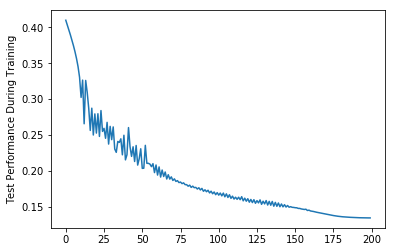

In [1687]:
plt.plot(perf_losses)
plt.ylabel('Test Performance During Training')
plt.show()


In [1629]:
correct= 0
total = 0
for i in range(0,1000):
    problem = getTestProblem(i)
    formulae = problem[0]
    target = problem[1]
    pred = reason(formulae, weights)
    if(target == 0):
        total = total + 1
        correct = correct + 1
        

In [1630]:
correct

58

In [1634]:
(weights[0:5])

array([[ 0.19064969,  1.35104817, -2.23884761,  0.23978148,  1.57010035],
       [-0.27460872, -0.8110921 ,  0.38456171, -0.28815522, -0.29381852],
       [-0.31312114, -1.57848662,  0.97163523, -0.46160046,  1.42648141],
       [-0.1115231 ,  0.76771936,  1.12100964,  0.24769324,  1.06791694],
       [ 0.02461347,  0.64565162, -0.68941827,  0.01772104, -0.11121253]])